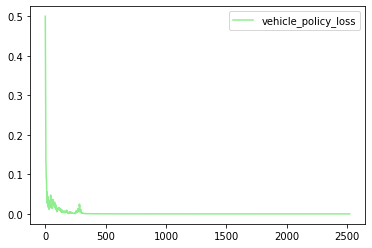

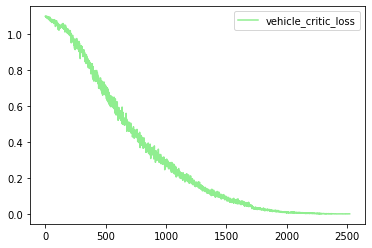

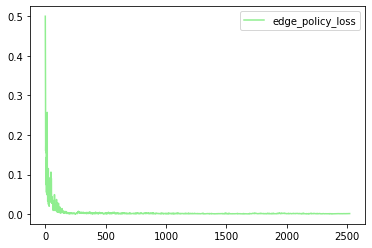

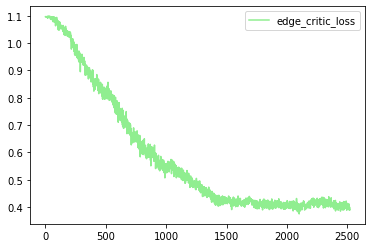

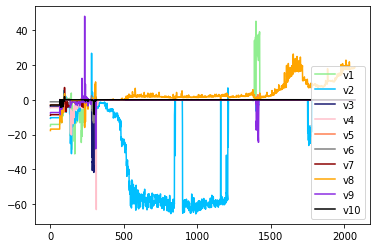

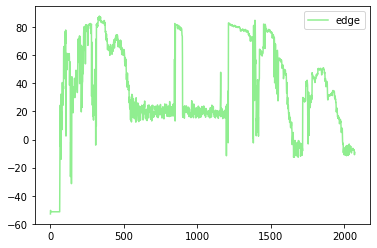

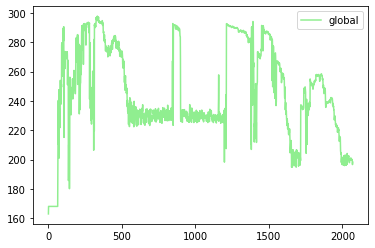

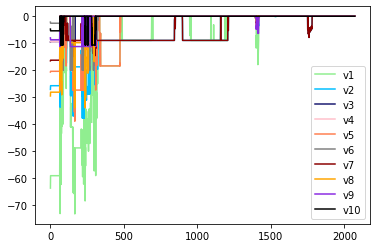

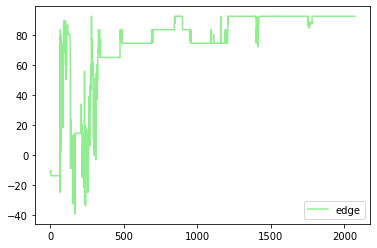

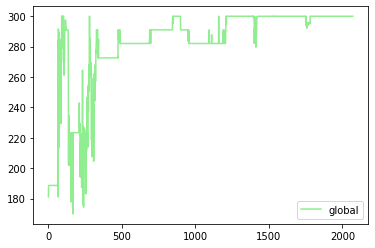

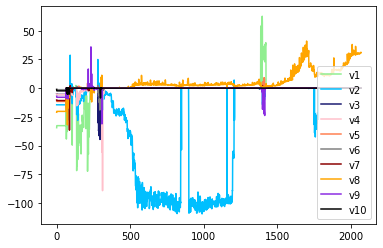

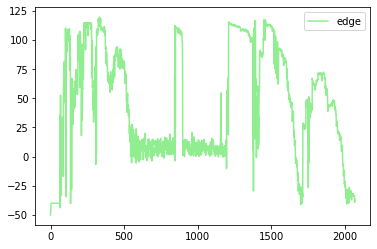

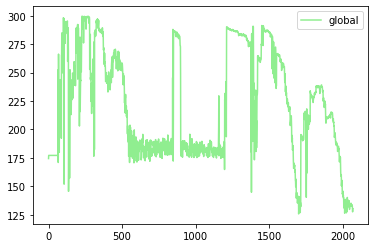

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

file_name = "/home/neardws/acme/396e87ae-fd22-11ec-858a-04d9f5632a58/"
file_name = "/home/neardws/acme/a3b998ee-fda2-11ec-a0ea-04d9f5632a58/"

loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/evaluator/logs.csv"

loss_df = pd.read_csv(loss_file_name, names=["actor_episodes", "actor_steps", "edge_critic_loss", "edge_policy_loss", "evaluator_episodes", "evaluator_steps", "learner_steps", "learner_walltime", "vehicle_critic_loss", "vehicle_policy_loss"], header=0)

vehicle_policy_loss = loss_df["vehicle_policy_loss"].values.tolist()
epoch_index = [i for i in range(len(vehicle_policy_loss))]
plt.plot(epoch_index, vehicle_policy_loss, '-', color='lightgreen', label='vehicle_policy_loss')
plt.legend(loc="best")  # 图例
plt.show()

vehicle_critic_loss = loss_df["vehicle_critic_loss"].values.tolist()
plt.plot(epoch_index, vehicle_critic_loss, '-', color='lightgreen', label='vehicle_critic_loss')
plt.legend(loc="best")  # 图例
plt.show()

edge_policy_loss = loss_df["edge_policy_loss"].values.tolist()
plt.plot(epoch_index, edge_policy_loss, '-', color='lightgreen', label='edge_policy_loss')
plt.legend(loc="best")  # 图例
plt.show()

edge_critic_loss = loss_df["edge_critic_loss"].values.tolist()
plt.plot(epoch_index, edge_critic_loss, '-', color='lightgreen', label='edge_critic_loss')
plt.legend(loc="best")  # 图例
plt.show()


returns_df = pd.read_csv(returns_file_name, names=["episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "label", "steps_per_second"], header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 3, 12))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").replace("\n", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        f_s = float(s)
        returns[ret_index][index % 3][int(np.floor(index / 3))] = f_s

epoch_index = [i for i in range(episode_return.shape[0])]


v1_return = returns[:, 0, 0].tolist()
v2_return = returns[:, 0, 1].tolist()
v3_return = returns[:, 0, 2].tolist()
v4_return = returns[:, 0, 3].tolist()
v5_return = returns[:, 0, 4].tolist()
v6_return = returns[:, 0, 5].tolist()
v7_return = returns[:, 0, 6].tolist()
v8_return = returns[:, 0, 7].tolist()
v9_return = returns[:, 0, 8].tolist()
v10_return = returns[:, 0, 9].tolist()
plt.plot(epoch_index, v1_return, '-', color='lightgreen', label='v1')
plt.plot(epoch_index, v2_return, '-', color='deepskyblue', label='v2')
plt.plot(epoch_index, v3_return, '-', color='midnightblue', label='v3')
plt.plot(epoch_index, v4_return, '-', color='pink', label='v4')
plt.plot(epoch_index, v5_return, '-', color='coral', label='v5')
plt.plot(epoch_index, v6_return, '-', color='gray', label='v6')
plt.plot(epoch_index, v7_return, '-', color='darkred', label='v7')
plt.plot(epoch_index, v8_return, '-', color='orange', label='v8')
plt.plot(epoch_index, v9_return, '-', color='blueviolet', label='v9')
plt.plot(epoch_index, v10_return, '-', color='black', label='v10')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 0, 10].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()

global_return = returns[:, 0, 11].tolist()
plt.plot(epoch_index, global_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()


v1_return = returns[:, 1, 0].tolist()
v2_return = returns[:, 1, 1].tolist()
v3_return = returns[:, 1, 2].tolist()
v4_return = returns[:, 1, 3].tolist()
v5_return = returns[:, 1, 4].tolist()
v6_return = returns[:, 1, 5].tolist()
v7_return = returns[:, 1, 6].tolist()
v8_return = returns[:, 1, 7].tolist()
v9_return = returns[:, 1, 8].tolist()
v10_return = returns[:, 1, 9].tolist()
plt.plot(epoch_index, v1_return, '-', color='lightgreen', label='v1')
plt.plot(epoch_index, v2_return, '-', color='deepskyblue', label='v2')
plt.plot(epoch_index, v3_return, '-', color='midnightblue', label='v3')
plt.plot(epoch_index, v4_return, '-', color='pink', label='v4')
plt.plot(epoch_index, v5_return, '-', color='coral', label='v5')
plt.plot(epoch_index, v6_return, '-', color='gray', label='v6')
plt.plot(epoch_index, v7_return, '-', color='darkred', label='v7')
plt.plot(epoch_index, v8_return, '-', color='orange', label='v8')
plt.plot(epoch_index, v9_return, '-', color='blueviolet', label='v9')
plt.plot(epoch_index, v10_return, '-', color='black', label='v10')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 1, 10].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()

global_return = returns[:, 1, 11].tolist()
plt.plot(epoch_index, global_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()


v1_return = returns[:, 2, 0].tolist()
v2_return = returns[:, 2, 1].tolist()
v3_return = returns[:, 2, 2].tolist()
v4_return = returns[:, 2, 3].tolist()
v5_return = returns[:, 2, 4].tolist()
v6_return = returns[:, 2, 5].tolist()
v7_return = returns[:, 2, 6].tolist()
v8_return = returns[:, 2, 7].tolist()
v9_return = returns[:, 2, 8].tolist()
v10_return = returns[:, 2, 9].tolist()
plt.plot(epoch_index, v1_return, '-', color='lightgreen', label='v1')
plt.plot(epoch_index, v2_return, '-', color='deepskyblue', label='v2')
plt.plot(epoch_index, v3_return, '-', color='midnightblue', label='v3')
plt.plot(epoch_index, v4_return, '-', color='pink', label='v4')
plt.plot(epoch_index, v5_return, '-', color='coral', label='v5')
plt.plot(epoch_index, v6_return, '-', color='gray', label='v6')
plt.plot(epoch_index, v7_return, '-', color='darkred', label='v7')
plt.plot(epoch_index, v8_return, '-', color='orange', label='v8')
plt.plot(epoch_index, v9_return, '-', color='blueviolet', label='v9')
plt.plot(epoch_index, v10_return, '-', color='black', label='v10')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 2, 10].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()

global_return = returns[:, 2, 11].tolist()
plt.plot(epoch_index, global_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()